df is: 
                         Relative Speed
King Name                             
Jushur                        0.998831
Kullassina-bel                0.998181
Nangishlishma                 0.996267
En-tarah-ana                  0.990506
Babum                         0.981956
Puannum                       0.997713
Kalibum                       0.998195
Zuqaqip                       0.997996
Atab                          0.995573
Mashda                        0.997683
Arwium                        0.996901
Etana                         0.999326
Balih                         0.989494
En-men-lu-ana                 0.998921
Dumuzid, the Shepherd         0.998378
Ensipazi-anna                 0.996524
Enmengal-ana                  0.996253
Dumuzid, the Fisherman        0.998319
En-me-barage-si               0.998012
Aga                           0.996013
Usi-watar                     0.306000
Nanniya                       0.201000
                        Reign (years)
Jushur           

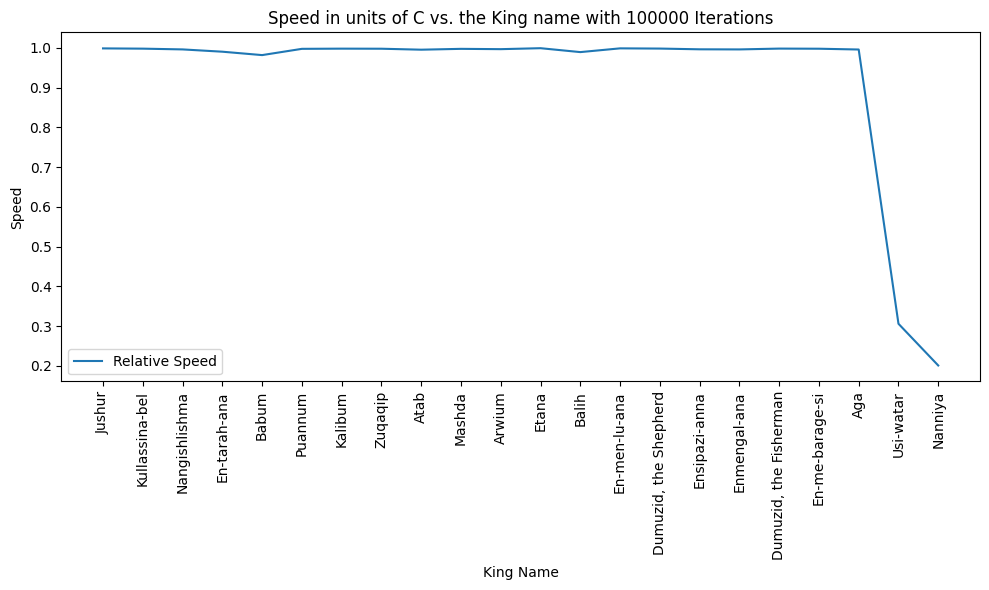

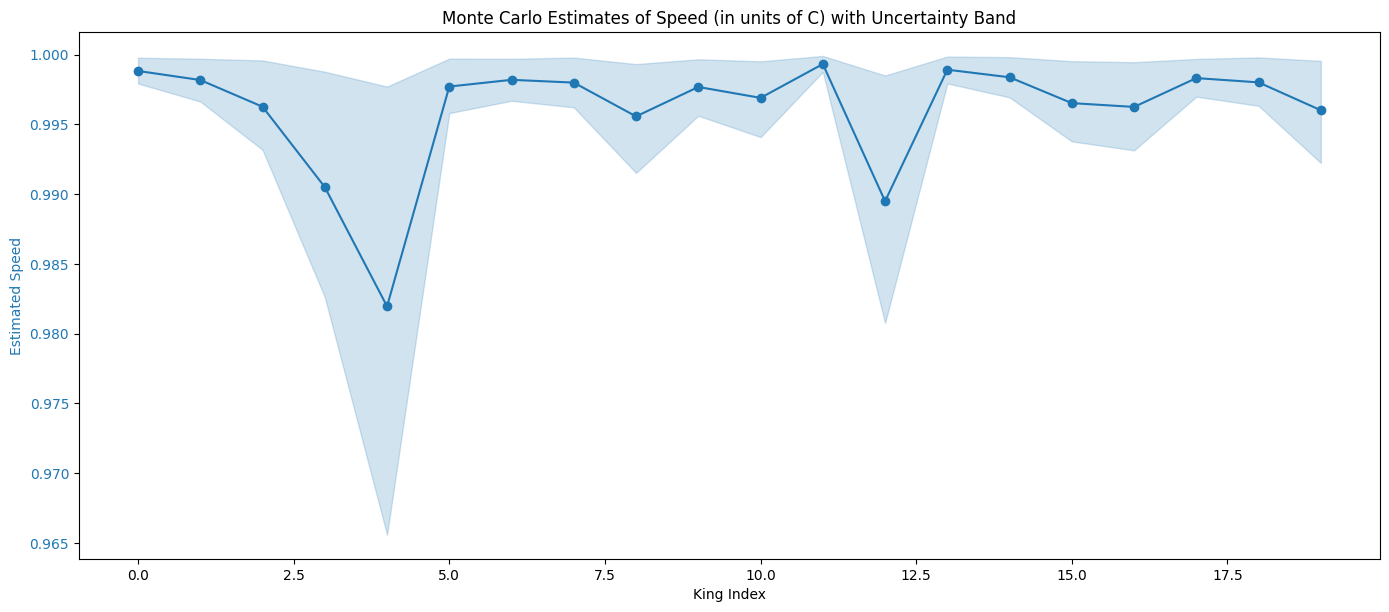

Total distance traveled during the voyage: 16418.58 light-years
Estimated net displacement from Earth after random walk: 3899.46 light-years


In [7]:

import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from scipy.stats import truncnorm



kish_kings = [
    # Antediluvian (mythical) kings
    ("Jushur", 1200),
    ("Kullassina-bel", 960),
    ("Nangishlishma", 670),
    ("En-tarah-ana", 420),
    ("Babum", 300),
    ("Puannum", 840),
    ("Kalibum", 960),
    ("Zuqaqip", 900),
    ("Atab", 600),
    ("Mashda", 840),
    ("Arwium", 720),
    ("Etana", 1560),
    ("Balih", 400),
    ("En-men-lu-ana", 1200),
    ("Dumuzid, the Shepherd", 1000),
    ("Ensipazi-anna", 700),
    ("Enmengal-ana", 670),
    ("Dumuzid, the Fisherman", 1000),

    # Postdiluvian (legendary/early historical) kings
    ("En-me-barage-si", 900),
    ("Aga", 625)
]

# Useful derived structures
king_names = [name for name, years in kish_kings]
reigns = np.array([years for name, years in kish_kings], dtype=float)

N_samples = 100000
lower_age = 10
upper_age = 80

#y_samples = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=N_samples)
b_samples_all = []
y_samples_all = []

# Monte Carlo sampling
for x_t in reigns:
    b_samples = np.random.uniform(0, 1, N_samples)
    y_samples = x_t * np.sqrt(1 - b_samples**2)
    valid = (y_samples >= lower_age) & (y_samples <= upper_age)
    b_samples_all.append(b_samples[valid])
    y_samples_all.append(y_samples[valid])

# Compute mean and percentiles
b_mean = np.array([np.mean(b) if len(b) > 0 else np.nan for b in b_samples_all])
b_lower = np.array([np.percentile(b, 5) if len(b) > 0 else np.nan for b in b_samples_all])
b_upper = np.array([np.percentile(a, 95) if len(a) > 0 else np.nan for a in b_samples_all])

y_mean = np.array([np.mean(y) if len(y) > 0 else np.nan for y in y_samples_all])
y_lower = np.array([np.percentile(y, 5) if len(y) > 0 else np.nan for y in y_samples_all])
y_upper = np.array([np.percentile(y, 95) if len(y) > 0 else np.nan for y in y_samples_all])

t = np.arange(len(reigns))


df = pd.DataFrame(b_mean, columns=["Relative Speed"],index=king_names)
df.index.name = "King Name"
df.loc['Usi-watar', 'Relative Speed'] = 0.306  # new value
df.loc['Nanniya', 'Relative Speed'] = 0.201  # new value
print("df is: \n",df)


df_time = pd.DataFrame(reigns, columns=["Reign (years)"],index=king_names)
print(df_time)

# Basic line plot
ax=df.plot(
    kind="line",          # or "line"
    figsize=(10, 6)
)

plot.xlabel(df.index.name)   # e.g. "KING"
plot.ylabel("Speed")
plot.title("Speed in units of C vs. the King name with 100000 Iterations")

ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=90)
plot.tight_layout()
plot.show()

# Plot with uncertainty bands
fig, ax1 = plot.subplots(figsize=(14,6))

# b(t) with uncertainty
color1 = 'tab:blue'
ax1.set_xlabel('King Index')
ax1.set_ylabel('Estimated Speed', color=color1)
ax1.plot(t, b_mean, color=color1, marker='o', label='Mean Speed')
ax1.fill_between(t, b_lower, b_upper, color=color1, alpha=0.2, label='5-95% Speed')
ax1.tick_params(axis='y', labelcolor=color1)


fig.tight_layout()
plot.title('Monte Carlo Estimates of Speed (in units of C) with Uncertainty Band')
plot.show()

# Total distance traveled (sum of all reigns at their respective speeds)
# Calculate distance for each king (in light-years)
distances = b_mean * reigns  # since c=1, units are light-years

total_distance = np.sum(distances)
print(f"Total distance traveled during the voyage: {total_distance:.2f} light-years")
# Estimate net displacement from Earth after random walk
step_sizes = distances  # already velocities * reigns
expected_distance = np.sqrt(np.sum(step_sizes ** 2))
print(f"Estimated net displacement from Earth after random walk: {expected_distance:.2f} light-years")


